In [1]:
import os
import matplotlib.pyplot as plt

with open('./fasta_extracted.txt', 'r') as f:
    lines = f.read().split('\n')

In [2]:
extracted_arr = []
for i in range(1, len(lines), 2):
    extracted_arr.append([lines[i-1], lines[i]])

In [3]:
def get_reverse_complement(in_sequence: str):
    sequence = ""
    stack = []
    for _ in in_sequence: stack.append(_)
    while len(stack) > 0: sequence += stack.pop()
    
    reverse_hash = {'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}
    
    return ''.join([reverse_hash[sequence[i]] for i in range(len(sequence))])

def get_trinucleotide_counts(trin_hash: dict, seq: str):
    for i in range(2, len(seq)):
        curr_trin = seq[i-2] + seq[i-1] + seq[i]
        
        if curr_trin in trin_hash:
            trin_hash[curr_trin] = trin_hash[curr_trin] + 1
        else:
            trin_hash[curr_trin] = 0
    
    return trin_hash

def get_trin_list():
    inter = []
    
    nucs = list('ACGT')
    for i in range(len(nucs)):
        for j in range(len(nucs)):
            inter.append(nucs[i] + nucs[j])
    
    final = []
    for i in range(len(inter)): final.append(f"{inter[i][0]}C{inter[i][1]}")
    for i in range(len(inter)): final.append(f"{inter[i][0]}T{inter[i][1]}")

    return final

In [4]:
"""
Need to count trinucleotides => _C_ and _T_

1 - take reverse complement of each seq
    - reverse
    - complement
2 - scan each seq for trinucleotides
3 - plot
"""
trinucleotide_count_hash = {}

for i in range(len(extracted_arr)):
    sequence = extracted_arr[i][1].upper()
    
    reverse_comp = get_reverse_complement(sequence)
    
    trinucleotide_count_hash = get_trinucleotide_counts(trinucleotide_count_hash, reverse_comp)

In [5]:
print(trinucleotide_count_hash)

{'ATG': 4106, 'TCC': 4864, 'CAT': 4495, 'ATA': 2713, 'GGG': 3558, 'GGT': 3158, 'GTC': 3089, 'TCT': 5840, 'CTG': 6716, 'TGA': 4964, 'GAA': 5065, 'AAT': 3940, 'ATC': 3815, 'CCA': 5443, 'CAG': 6507, 'AGG': 4806, 'GGA': 4617, 'AAA': 5260, 'AAG': 4991, 'AGC': 4567, 'GCT': 4568, 'CTA': 2172, 'TAT': 2736, 'ATT': 4116, 'TTG': 4502, 'TGC': 4486, 'GCA': 4476, 'AGA': 5103, 'GAG': 4508, 'GAT': 3570, 'TCA': 5073, 'CAA': 4273, 'TGG': 5284, 'GGC': 4213, 'AAC': 3208, 'ACC': 3188, 'CCT': 5032, 'TAA': 2799, 'CTT': 5619, 'TTC': 5863, 'AGT': 3549, 'GTT': 3329, 'TTT': 6595, 'TTA': 2697, 'GCC': 4230, 'TCG': 1516, 'CGC': 1699, 'GAC': 3053, 'ACT': 3720, 'CTC': 4750, 'CAC': 4044, 'ACA': 4253, 'GCG': 1676, 'CCC': 3762, 'TAC': 2270, 'CCG': 2067, 'TGT': 4366, 'ACG': 1316, 'CGG': 2103, 'CGA': 1363, 'GTG': 3831, 'GTA': 2304, 'TAG': 2074, 'CGT': 1426}


In [6]:
trin_list = get_trin_list()
trin_list.sort()
print(trin_list)

trin_pos_hash = {}
for i in range(len(trin_list)): trin_pos_hash[trin_list[i]] = i

['ACA', 'ACC', 'ACG', 'ACT', 'ATA', 'ATC', 'ATG', 'ATT', 'CCA', 'CCC', 'CCG', 'CCT', 'CTA', 'CTC', 'CTG', 'CTT', 'GCA', 'GCC', 'GCG', 'GCT', 'GTA', 'GTC', 'GTG', 'GTT', 'TCA', 'TCC', 'TCG', 'TCT', 'TTA', 'TTC', 'TTG', 'TTT']


In [7]:
final_counts = [0 for _ in trin_list]
for key in trinucleotide_count_hash:
    if key in trin_list:
        pos = trin_pos_hash[key]
        
        final_counts[pos] = trinucleotide_count_hash[key]

Text(0, 0.5, 'Frequency')

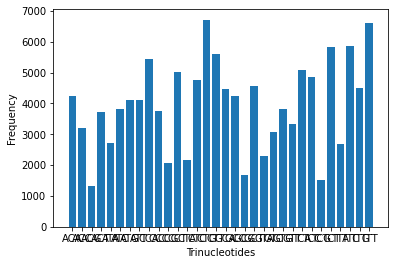

In [8]:
plt.bar(trin_list, final_counts)
plt.xlabel('Trinucleotides')
plt.ylabel('Frequency')